### 데이터 로드

In [1]:
import numpy as np
import pandas as pd

In [2]:
vip_df = pd.read_csv('./data/신용카드VIP회원정보_최종.csv')
vip_df.head()

,기준년월,발급회원번호,연령,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,거주시도명,...,컨택건수_이용유도_청구서_B0M,컨택건수_이용유도_인터넷_B0M,컨택건수_이용유도_당사앱_B0M,증감율_이용건수_신용_전월,증감율_이용금액_신용_전월,증감율_이용건수_신용_분기,증감율_이용금액_신용_분기,변동률_잔액_B1M,양육자녀_유무,y
0,201807,SYN_0,40,7,1,0,1,61,0,경기,...,0,0,0,0.454549,0.409767,-0.476454,-0.411320,0.261886,1,0
1,201807,SYN_8,20,7,1,0,0,0,0,충남,...,0,1,0,-0.272107,0.137583,0.464710,0.228002,-0.241684,0,0
2,201807,SYN_9,30,6,1,0,0,0,0,경기,...,1,1,0,0.291142,0.329639,-0.345280,-0.061798,0.273881,1,0
3,201807,SYN_17,70,7,1,0,0,0,0,경기,...,0,1,0,-0.021992,0.304045,0.057209,-0.196456,0.131636,0,0
4,201807,SYN_18,40,7,1,0,0,0,0,경기,...,0,0,0,0.000000,0.000103,-2.000000,-2.000000,0.093721,1,0


In [3]:
vip_df.columns

Index(['기준년월', '발급회원번호', '연령', 'VIP등급코드', '회원여부_이용가능', '회원여부_연체', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급1년이내', '거주시도명', '유효카드수_신용', '이용카드수_신용',
       '이용금액_R3M_신용', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수',
       'Life_Stage', 'CA이자율_할인전', '강제한도감액금액_R12M', '한도증액금액_R12M', '연체감액여부_R3M',
       '시장단기연체여부_R3M', '최종이용일자_신판', '이용건수_신용_B0M', '이용금액_신용_B0M', '이용후경과월_신용',
       '이용건수_신용_R12M', '이용금액_신용_R12M', '이용가맹점수', '이용금액_업종기준', '이용금액_쇼핑',
       '이용금액_요식', '이용금액_교통', '이용금액_의료', '이용금액_납부', '이용금액_교육', '이용금액_여유생활',
       '이용금액_사교활동', '이용금액_일상생활', '이용금액_해외', 'RP건수_B0M', 'RP금액_B0M', '이용금액대',
       '포인트_잔여포인트_B0M', '마일_잔여포인트_B0M', '잔액_B0M', '연체일수_B2M', '월중평잔', '평잔_3M',
       '평잔_6M', '컨택건수_이용유도_TM_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_이용유도_EM_B0M',
       '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_당사앱_B0M',
       '증감율_이용건수_신용_전월', '증감율_이용금액_신용_전월', '증감율_이용건수_신용_분기', '증감율_이용금액_신용_분기',
       '변동률_잔액_B1M', '양육자녀_유무', 'y'],
      dtype='object')

### XGBoost

In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier

In [6]:
# X 컬럼 정리

x_cols = [
    # 활동/추이
    "이용금액_R3M_신용",
    "이용건수_신용_B0M", "이용금액_신용_B0M",
    "이용후경과월_신용",
    "이용건수_신용_R12M", "이용금액_신용_R12M",
    "증감율_이용건수_신용_전월", "증감율_이용금액_신용_전월",
    "증감율_이용건수_신용_분기", "증감율_이용금액_신용_분기",

    # 탈회 이력
    "탈회횟수_누적", "최종탈회후경과월", "탈회횟수_발급1년이내",

    # 연체/리스크
    "회원여부_연체", "연체감액여부_R3M", "시장단기연체여부_R3M",
    "연체일수_B2M", "강제한도감액금액_R12M", "한도증액금액_R12M",

    # 카드 사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 기본 속성
    "연령", "VIP등급코드", "거주시도명", "Life_Stage", "양육자녀_유무",
    "회원여부_이용가능", "CA이자율_할인전", "이용금액대",
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수", "_2순위카드이용금액", "_2순위카드이용건수",
]



In [8]:
vip_df['이용금액대']

0          01.100만원+
1          01.100만원+
2           04.10만원+
3           02.50만원+
4             09.미사용
             ...    
3579913    01.100만원+
3579914    01.100만원+
3579915    01.100만원+
3579916     02.50만원+
3579917    01.100만원+
Name: 이용금액대, Length: 3579918, dtype: object

In [10]:
# 1) vip_df에서 object 범주형 컬럼 원핫 인코딩 (vip_df 자체를 변경)
cat_cols = ["거주시도명", "Life_Stage", "이용금액대"]
cat_cols = [c for c in cat_cols if c in vip_df.columns]

vip_df = pd.get_dummies(vip_df, columns=cat_cols)

# 2) x_cols 재구성 (기존 리스트 말고, 원핫된 컬럼까지 포함해서 다시 만듦)
DROP_COLS = ["y", "발급회원번호", "기준년월", "최종이용일자_신판"]
x_cols = [c for c in vip_df.columns if c not in DROP_COLS]

In [11]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth =6, random_state = 42)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [12]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.9999832398395717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1180739
           1       1.00      1.00      1.00     12567

    accuracy                           1.00   1193306
   macro avg       1.00      1.00      1.00   1193306
weighted avg       1.00      1.00      1.00   1193306



In [18]:
# X 컬럼 정리

x_cols = [
    # 활동/추이
    # "이용금액_R3M_신용",
    # "이용건수_신용_B0M", "이용금액_신용_B0M",
    "이용후경과월_신용",
    # "이용건수_신용_R12M", "이용금액_신용_R12M",
    "증감율_이용건수_신용_전월", "증감율_이용금액_신용_전월",
    "증감율_이용건수_신용_분기", "증감율_이용금액_신용_분기",

    # 탈회 이력
    # "탈회횟수_누적", "최종탈회후경과월", "탈회횟수_발급1년이내",

    # 연체/리스크
    "회원여부_연체", "연체감액여부_R3M", "시장단기연체여부_R3M",
    "연체일수_B2M", "강제한도감액금액_R12M", "한도증액금액_R12M",

    # 카드 사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 기본 속성
    "연령", "VIP등급코드", "거주시도명", "Life_Stage", "양육자녀_유무",
    "회원여부_이용가능", "CA이자율_할인전", "이용금액대",
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수", "_2순위카드이용금액", "_2순위카드이용건수",
]



In [19]:
# 1) vip_df에서 object 범주형 컬럼 원핫 인코딩 (vip_df 자체를 변경)
cat_cols = ["거주시도명", "Life_Stage", "이용금액대"]
cat_cols = [c for c in cat_cols if c in vip_df.columns]

vip_df = pd.get_dummies(vip_df, columns=cat_cols)

# 2) x_cols 재구성 (기존 리스트 말고, 원핫된 컬럼까지 포함해서 다시 만듦)
DROP_COLS = ["y", "발급회원번호", "기준년월", "최종이용일자_신판"]
x_cols = [c for c in vip_df.columns if c not in DROP_COLS]

In [20]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth =6, random_state = 42)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.9999832398395717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1180739
           1       1.00      1.00      1.00     12567

    accuracy                           1.00   1193306
   macro avg       1.00      1.00      1.00   1193306
weighted avg       1.00      1.00      1.00   1193306



---

In [22]:
x_cols = [
    # 프로필
    "연령", "VIP등급코드", "거주시도명", "Life_Stage", "양육자녀_유무", "CA이자율_할인전",

    # 보유/사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수", "_2순위카드이용금액", "_2순위카드이용건수",

    # 최근 1년 누적
    "이용건수_신용_R12M", "이용금액_신용_R12M",

    # 업종별 이용
    "이용금액_업종기준", "이용금액_쇼핑", "이용금액_요식", "이용금액_교통",
    "이용금액_의료", "이용금액_납부", "이용금액_교육", "이용금액_여유생활",
    "이용금액_사교활동", "이용금액_일상생활", "이용금액_해외",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 포인트/마일
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
]

In [23]:
# 1) vip_df에서 object 범주형 컬럼 원핫 인코딩 (vip_df 자체를 변경)
cat_cols = ["거주시도명", "Life_Stage", "이용금액대"]
cat_cols = [c for c in cat_cols if c in vip_df.columns]

vip_df = pd.get_dummies(vip_df, columns=cat_cols)

# 2) x_cols 재구성 (기존 리스트 말고, 원핫된 컬럼까지 포함해서 다시 만듦)
DROP_COLS = ["y", "발급회원번호", "기준년월", "최종이용일자_신판"]
x_cols = [c for c in vip_df.columns if c not in DROP_COLS]

In [24]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth =6, random_state = 42)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

1.0
0.9999832398395717
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1180739
           1       1.00      1.00      1.00     12567

    accuracy                           1.00   1193306
   macro avg       1.00      1.00      1.00   1193306
weighted avg       1.00      1.00      1.00   1193306



In [26]:
print("X_train shape:", X_train.shape)
print("X_train columns n:", len(X_train.columns))
print("X_train columns head:", X_train.columns[:10].tolist())

X_train shape: (2386612, 87)
X_train columns n: 87
X_train columns head: ['연령', 'VIP등급코드', '회원여부_이용가능', '회원여부_연체', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급1년이내', '유효카드수_신용', '이용카드수_신용', '이용금액_R3M_신용']


---

In [30]:
# 1) 원핫 인코딩
cat_cols = ["거주시도명", "Life_Stage"]  # 이용금액대는 애매하니 일단 빼는 걸 추천
cat_cols = [c for c in cat_cols if c in vip_df.columns]
vip_df = pd.get_dummies(vip_df, columns=cat_cols)



In [31]:
cols = [
    # 프로필
    "연령", "VIP등급코드", "거주시도명", "Life_Stage", "양육자녀_유무", "CA이자율_할인전",

    # 보유/사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수", "_2순위카드이용금액", "_2순위카드이용건수",

    # 최근 1년 누적
    "이용건수_신용_R12M", "이용금액_신용_R12M",

    # 업종별 이용
    "이용금액_업종기준", "이용금액_쇼핑", "이용금액_요식", "이용금액_교통",
    "이용금액_의료", "이용금액_납부", "이용금액_교육", "이용금액_여유생활",
    "이용금액_사교활동", "이용금액_일상생활", "이용금액_해외",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 포인트/마일
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
]

In [32]:
# 3) 원핫으로 늘어난 컬럼들(접두어 기반으로 자동 포함)
onehot_cols = [c for c in vip_df.columns if c.startswith("거주시도명_") or c.startswith("Life_Stage_")]

# 4) 최종 x_cols = base + onehot (존재하는 것만)
x_cols = [c for c in cols if c in vip_df.columns] + onehot_cols


In [33]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth =6, random_state = 42)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [34]:
df = vip_df.loc[:, ["기준년월"] + x_cols + ["y"]].copy()

train_df = df[df["기준년월"].between(201807, 201810)].copy()
test_df  = df[df["기준년월"].between(201811, 201812)].copy()

X_train, y_train = train_df[x_cols], train_df["y"]
X_test,  y_test  = test_df[x_cols],  test_df["y"]

print("X_train shape:", X_train.shape)
print("X_train head cols:", X_train.columns[:12].tolist())


xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_clf.fit(X_train, y_train)

X_train shape: (2386612, 55)
X_train head cols: ['연령', 'VIP등급코드', '양육자녀_유무', 'CA이자율_할인전', '유효카드수_신용', '이용카드수_신용', '이용가맹점수', '_1순위카드이용금액', '_1순위카드이용건수', '_2순위카드이용금액', '_2순위카드이용건수', '이용건수_신용_R12M']


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [35]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9999991619919786
0.9999824018315503
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1180739
           1       1.00      1.00      1.00     12567

    accuracy                           1.00   1193306
   macro avg       1.00      1.00      1.00   1193306
weighted avg       1.00      1.00      1.00   1193306



---

In [36]:
leak_cols = {
    "회원여부_이용가능","탈회횟수_누적","최종탈회후경과월","탈회횟수_발급1년이내",
    "이용금액_R3M_신용","이용후경과월_신용","최종이용일자_신판",
    "이용건수_신용_B0M","이용금액_신용_B0M",
    "회원여부_연체","연체감액여부_R3M","시장단기연체여부_R3M","연체일수_B2M",
    "컨택건수_이용유도_TM_B0M","컨택건수_이용유도_LMS_B0M","컨택건수_이용유도_EM_B0M",
    "컨택건수_이용유도_청구서_B0M","컨택건수_이용유도_인터넷_B0M","컨택건수_이용유도_당사앱_B0M",
    "증감율_이용건수_신용_전월","증감율_이용금액_신용_전월",
    "증감율_이용건수_신용_분기","증감율_이용금액_신용_분기",
    "이용금액대"
}

found = sorted(set(X_train.columns) & leak_cols)
print("X에 남아있는 누수 의심 컬럼:", found)

X에 남아있는 누수 의심 컬럼: []


In [38]:
import numpy as np
from sklearn.metrics import average_precision_score, roc_auc_score
from xgboost import XGBClassifier

y_train_shuf = y_train.sample(frac=1, random_state=42).values

m = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
m.fit(X_train, y_train_shuf)

proba = m.predict_proba(X_test)[:, 1]
print("Shuffled y -> PR-AUC:", average_precision_score(y_test, proba))
print("Shuffled y -> ROC-AUC:", roc_auc_score(y_test, proba))

Shuffled y -> PR-AUC: 0.008598860521104916
Shuffled y -> ROC-AUC: 0.44840614895788056


In [39]:
import pandas as pd

sus = []
for c in X_train.columns:
    vc = X_train[c].nunique(dropna=True)
    if vc <= 20:  # 값 종류 적은 애들만
        rate = pd.DataFrame({"x": X_train[c], "y": y_train}).groupby("x")["y"].mean()
        if rate.min() == 0 and rate.max() == 1:
            sus.append(c)

print("값만 보면 y가 0/1로 갈리는 컬럼:", sus)

값만 보면 y가 0/1로 갈리는 컬럼: []


In [40]:
import numpy as np
import pandas as pd

best = []
for c in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[c]):
        s = pd.DataFrame({"x": X_train[c], "y": y_train}).dropna()
        x = s["x"].values
        y = s["y"].values

        order = np.argsort(x)
        x_sorted = x[order]
        y_sorted = y[order]

        pos_cum = np.cumsum(y_sorted)
        total_pos = pos_cum[-1]
        n = len(y_sorted)

        # 왼쪽=0, 오른쪽=1로 예측할 때 오류 수
        err_left = pos_cum
        err_right = (n - np.arange(1, n+1)) - (total_pos - pos_cum)
        err = err_left + err_right

        best_err = int(err.min())
        best.append((c, best_err))

best = sorted(best, key=lambda x: x[1])
print("단일 임계값으로 분리 잘 되는 컬럼 Top 20:")
print(best[:20])

단일 임계값으로 분리 잘 되는 컬럼 Top 20:
[('연령', 16544), ('VIP등급코드', 16544), ('양육자녀_유무', 16544), ('CA이자율_할인전', 16544), ('유효카드수_신용', 16544), ('이용카드수_신용', 16544), ('이용가맹점수', 16544), ('_1순위카드이용금액', 16544), ('_1순위카드이용건수', 16544), ('_2순위카드이용금액', 16544), ('_2순위카드이용건수', 16544), ('이용건수_신용_R12M', 16544), ('이용금액_신용_R12M', 16544), ('이용금액_업종기준', 16544), ('이용금액_쇼핑', 16544), ('이용금액_요식', 16544), ('이용금액_교통', 16544), ('이용금액_의료', 16544), ('이용금액_납부', 16544), ('이용금액_교육', 16544)]


In [41]:
import pandas as pd

# X 전체를 문자열/해시로 바꿔서 동일 행 겹침 확인
train_sig = pd.util.hash_pandas_object(X_train, index=False)
test_sig  = pd.util.hash_pandas_object(X_test, index=False)

overlap = len(set(train_sig) & set(test_sig))
print("동일한 X 행(특징벡터) train/test overlap 개수:", overlap)
print("test 중 overlap 비율:", overlap / len(test_sig))

동일한 X 행(특징벡터) train/test overlap 개수: 294
test 중 overlap 비율: 0.0002463743582953576


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

m1 = XGBClassifier(
    n_estimators=1,     # 트리 1개
    max_depth=1,        # stump
    learning_rate=1.0,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42
)
m1.fit(X_train, y_train)
pred = m1.predict(X_test)
print(classification_report(y_test, pred, digits=4))

# 어떤 피처를 썼는지(트리 덤프)
print(m1.get_booster().get_dump(with_stats=False)[0])

              precision    recall  f1-score   support

           0     1.0000    0.9945    0.9973   1180739
           1     0.6610    1.0000    0.7959     12567

    accuracy                         0.9946   1193306
   macro avg     0.8305    0.9973    0.8966   1193306
weighted avg     0.9964    0.9946    0.9951   1193306

0:[이용금액_신용_R12M<123837] yes=1,no=2,missing=2
	1:leaf=84.5565643
	2:leaf=-1.00691843



In [43]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import average_precision_score

# 확률로 평가(불균형이라 AP가 더 적절)
base_proba = xgb_clf.predict_proba(X_test)[:,1]
base_ap = average_precision_score(y_test, base_proba)
print("BASE AP:", base_ap)

r = permutation_importance(
    xgb_clf, X_test, y_test,
    n_repeats=3,
    random_state=42,
    scoring="average_precision"
)

imp = pd.Series(r.importances_mean, index=X_test.columns).sort_values(ascending=False)
print(imp.head(30))

BASE AP: 0.9998757262954984


KeyboardInterrupt: 

---

In [8]:
x_cols = [
    # 기본 속성
    "연령", "VIP등급코드", "양육자녀_유무", "CA이자율_할인전",

    # 지역/라이프스테이지(원핫 전 컬럼명은 넣지 말고 onehot로 붙일 것)
    # "거주시도명", "Life_Stage",

    # 보유/사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수",
    "_2순위카드이용금액", "_2순위카드이용건수",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 포인트/마일
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
]

# 원핫 인코딩 후 자동 추가
onehot_cols = [c for c in vip_df.columns if c.startswith("거주시도명_") or c.startswith("Life_Stage_")]
x_cols = [c for c in x_cols if c in vip_df.columns] + onehot_cols

In [9]:
print([c for c in x_cols if "R12M" in c])

[]


In [10]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = 0.05, max_depth =6, random_state = 42)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9946392626870224
0.9916475740505788
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1180739
           1       0.66      0.42      0.51     12567

    accuracy                           0.99   1193306
   macro avg       0.83      0.71      0.76   1193306
weighted avg       0.99      0.99      0.99   1193306



Test ROC-AUC: 0.994387324752074


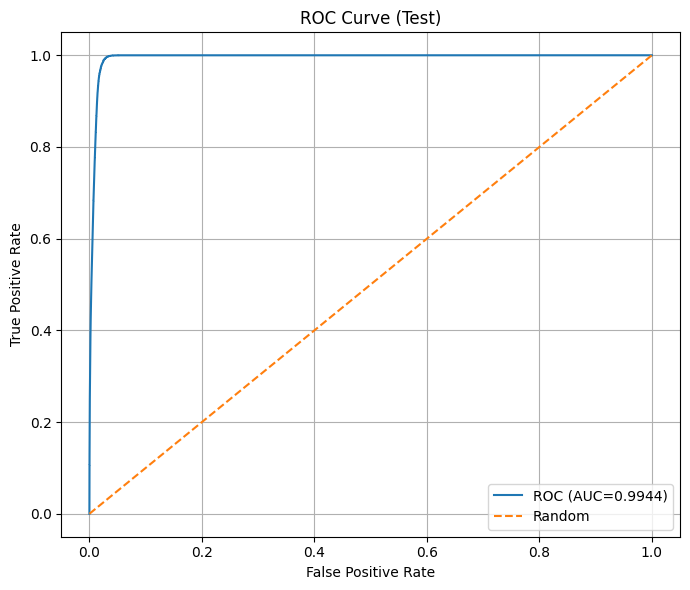

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 1) 확률 예측 (ROC는 보통 predict가 아니라 predict_proba 사용)
y_proba_test = xgb_clf.predict_proba(X_test)[:, 1]

# 2) ROC 커브 좌표
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)

# 3) AUC
auc = roc_auc_score(y_test, y_proba_test)
print("Test ROC-AUC:", auc)

# 4) 그리기
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"ROC (AUC={auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

In [49]:
pos = y_train.sum()
neg = len(y_train) - pos
spw = neg / pos
print("scale_pos_weight:", spw)

scale_pos_weight: 143.25846228239845


In [50]:
# x 컬럼 필터
df = vip_df.loc[:, ['기준년월'] + x_cols + ['y']].copy()

# 날짜로 나누기
train_df = df[df['기준년월'].between(201807, 201810)].copy()
test_df = df[df['기준년월'].between(201811, 201812)].copy()

# X/y 나누기
X_train = train_df[x_cols]
y_train = train_df['y']

X_test = test_df[x_cols]
y_test = test_df['y']

# 학습
xgb_clf = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,              # 6 -> 4 (과적합/치트 방지에 도움)
    min_child_weight=10,      # leaf에 최소 "가중치" 제약 (과적합↓)
    gamma=0.1,                # split 최소 개선량 (LGBM min_split_gain 대응)
    subsample=0.8,            # 행 샘플링 (과적합↓)
    colsample_bytree=0.8,     # 컬럼 샘플링 (과적합↓)
    reg_alpha=1.0,            # L1
    reg_lambda=1.0,           # L2
    scale_pos_weight=spw,     # 불균형 핵심
    random_state=42,
    n_jobs=-1,
    eval_metric="aucpr"       # 불균형에 맞는 평가
)

xgb_clf.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [51]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9807983032013582
0.975686873274751
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1180739
           1       0.30      0.99      0.46     12567

    accuracy                           0.98   1193306
   macro avg       0.65      0.98      0.72   1193306
weighted avg       0.99      0.98      0.98   1193306



---

In [ ]:
from xgboost import XGBClassifier

# 1) y_train 기준으로 pos/neg 개수 계산
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()

scale_pos_weight = neg / pos
print("pos:", pos, "neg:", neg, "scale_pos_weight:", scale_pos_weaight)

# 2) scale_pos_weight만 추가해서 학습
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"   # 경고방지/평가 기준 명시
)

xgb_clf.fit(X_train, y_train)

pos: 16544 neg: 2370068 scale_pos_weight: 143.25846228239845


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [53]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9828815911425904
0.9778824542908525
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1180739
           1       0.32      0.98      0.48     12567

    accuracy                           0.98   1193306
   macro avg       0.66      0.98      0.74   1193306
weighted avg       0.99      0.98      0.98   1193306



ROC-AUC (train): 0.9968425861955453
ROC-AUC (test) : 0.9944421175803647


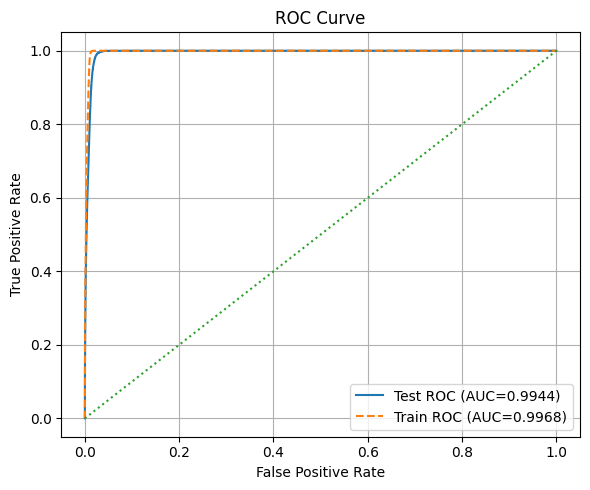

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# 1) 확률 예측 (클래스 1 확률)
y_proba_train = xgb_clf.predict_proba(X_train)[:, 1]
y_proba_test  = xgb_clf.predict_proba(X_test)[:, 1]

# 2) ROC-AUC 점수
auc_train = roc_auc_score(y_train, y_proba_train)
auc_test  = roc_auc_score(y_test, y_proba_test)
print("ROC-AUC (train):", auc_train)
print("ROC-AUC (test) :", auc_test)

# 3) ROC Curve 좌표
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test,  tpr_test,  _ = roc_curve(y_test,  y_proba_test)

# 4) Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC={auc_test:.4f})")
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC={auc_train:.4f})", linestyle="--")
plt.plot([0, 1], [0, 1], linestyle=":")  # 랜덤 기준선

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
vip_df--

,기준년월,발급회원번호,연령,VIP등급코드,회원여부_이용가능,회원여부_연체,탈회횟수_누적,최종탈회후경과월,탈회횟수_발급1년이내,유효카드수_신용,...,Life_Stage_4.자녀성장기(1),Life_Stage_5.자녀성장기(2),Life_Stage_6.자녀출가기,Life_Stage_7.노령,이용금액대_01.100만원+,이용금액대_02.50만원+,이용금액대_03.30만원+,이용금액대_04.10만원+,이용금액대_05.10만원-,이용금액대_09.미사용
0,201807,SYN_0,40,7,1,0,1,61,0,1,...,False,True,False,False,True,False,False,False,False,False
1,201807,SYN_8,20,7,1,0,0,0,0,4,...,False,False,False,False,True,False,False,False,False,False
2,201807,SYN_9,30,6,1,0,0,0,0,3,...,False,False,False,False,False,False,False,True,False,False
3,201807,SYN_17,70,7,1,0,0,0,0,1,...,False,False,False,True,False,True,False,False,False,False
4,201807,SYN_18,40,7,1,0,0,0,0,1,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579913,201812,SYN_2999978,40,6,1,0,0,0,0,4,...,False,True,False,False,True,False,False,False,False,False
3579914,201812,SYN_2999982,40,7,1,0,1,51,0,3,...,True,False,False,False,True,False,False,False,False,False
3579915,201812,SYN_2999984,30,7,1,0,0,0,0,1,...,False,False,False,False,True,False,False,False,False,False
3579916,201812,SYN_2999990,30,7,1,0,1,48,0,3,...,False,False,False,False,False,True,False,False,False,False


---

In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ---------------------------
# 1. 사용할 X 컬럼 정의
# ---------------------------

x_cols = [
    # 기본 속성
    "연령", "VIP등급코드", "양육자녀_유무", "CA이자율_할인전",

    # 보유/사용 폭
    "유효카드수_신용", "이용카드수_신용", "이용가맹점수",

    # 1~2순위
    "_1순위카드이용금액", "_1순위카드이용건수",
    "_2순위카드이용금액", "_2순위카드이용건수",

    # 잔액/평잔
    "잔액_B0M", "월중평잔", "평잔_3M", "평잔_6M", "변동률_잔액_B1M",

    # 포인트/마일
    "포인트_잔여포인트_B0M", "마일_잔여포인트_B0M",
]

# 원핫 컬럼 자동 추가
onehot_cols = [c for c in vip_df.columns 
               if c.startswith("거주시도명_") or c.startswith("Life_Stage_")]

x_cols = [c for c in x_cols if c in vip_df.columns] + onehot_cols

# ---------------------------
# 2. 201811 한 달 데이터만 선택
# ---------------------------

df = vip_df.loc[vip_df['기준년월'] == 201811, x_cols + ['y']].copy()

# ---------------------------
# 3. 80 / 20 분할 (stratify 권장)
# ---------------------------

X = df[x_cols]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # 클래스 비율 유지
)

# ---------------------------
# 4. 학습
# ---------------------------

# 클래스 불균형 대응
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos

xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

# ---------------------------
# 5. 평가
# ---------------------------

y_pred_train = xgb_clf.predict(X_train)
y_pred_test  = xgb_clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))
print("\nTest Classification Report")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.9814841972504934
Test Accuracy : 0.980315257560902

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    118139
           1       0.33      0.97      0.50      1192

    accuracy                           0.98    119331
   macro avg       0.67      0.97      0.74    119331
weighted avg       0.99      0.98      0.99    119331



In [4]:
from sklearn.metrics import precision_recall_curve

# ---------------------------
# 6. 임계점(threshold) 적용 평가
# ---------------------------

# (1) 테스트 확률 예측 (클래스 1 확률)
y_proba_test = xgb_clf.predict_proba(X_test)[:, 1]

# (2) 임계점 직접 지정해서 예측
threshold = 0.8   # 여기 숫자만 바꾸면 됨 (예: 0.6, 0.7, 0.9 등)
y_pred_th = (y_proba_test >= threshold).astype(int)

print(f"\n=== Threshold = {threshold} ===")
print(classification_report(y_test, y_pred_th))

# ---------------------------
# 7. (옵션) 최적 임계점 찾기: F1 최대 기준
# ---------------------------

prec, rec, ths = precision_recall_curve(y_test, y_proba_test)

# precision_recall_curve의 ths 길이는 prec/rec보다 1 짧음
f1_scores = 2 * (prec[:-1] * rec[:-1]) / (prec[:-1] + rec[:-1] + 1e-12)

best_idx = f1_scores.argmax()
best_threshold = ths[best_idx]

print(f"\n[Best threshold by F1] {best_threshold:.4f}")
y_pred_best = (y_proba_test >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))


=== Threshold = 0.8 ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    118139
           1       0.37      0.93      0.53      1192

    accuracy                           0.98    119331
   macro avg       0.69      0.96      0.76    119331
weighted avg       0.99      0.98      0.99    119331


[Best threshold by F1] 0.9703
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    118139
           1       0.48      0.77      0.59      1192

    accuracy                           0.99    119331
   macro avg       0.74      0.88      0.79    119331
weighted avg       0.99      0.99      0.99    119331



In [5]:
import numpy as np
import pandas as pd

# 테스트 확률 예측
y_proba_test = xgb_clf.predict_proba(X_test)[:, 1]

# 확률 + 실제값 묶기
topk_df = pd.DataFrame({
    "y_true": y_test.values,
    "y_proba": y_proba_test
})

# 확률 기준 내림차순 정렬
topk_df = topk_df.sort_values("y_proba", ascending=False).reset_index(drop=True)

def evaluate_topk(df, k_percent):
    n_total = len(df)
    k = int(n_total * k_percent)

    topk = df.iloc[:k]

    actual_positives = df["y_true"].sum()
    captured_positives = topk["y_true"].sum()

    precision = captured_positives / k
    recall = captured_positives / actual_positives

    print(f"\n=== Top {int(k_percent*100)}% ===")
    print("타겟 고객 수:", k)
    print("잡은 이탈자 수:", int(captured_positives))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))

# 평가
evaluate_topk(topk_df, 0.01)  # Top 1%
evaluate_topk(topk_df, 0.03)  # Top 3%
evaluate_topk(topk_df, 0.05)  # Top 5%


=== Top 1% ===
타겟 고객 수: 1193
잡은 이탈자 수: 662
Precision: 0.5549
Recall: 0.5554

=== Top 3% ===
타겟 고객 수: 3579
잡은 이탈자 수: 1163
Precision: 0.325
Recall: 0.9757

=== Top 5% ===
타겟 고객 수: 5966
잡은 이탈자 수: 1192
Precision: 0.1998
Recall: 1.0


c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53448 (\N{

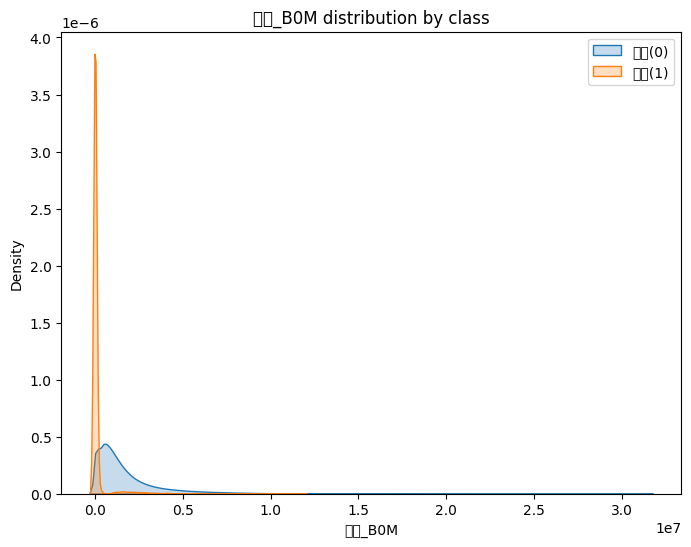

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

col = "잔액_B0M"

plt.figure(figsize=(8,6))
sns.kdeplot(vip_df[vip_df["y"]==0][col], label="잔류(0)", fill=True)
sns.kdeplot(vip_df[vip_df["y"]==1][col], label="이탈(1)", fill=True)

plt.title(f"{col} distribution by class")
plt.legend()
plt.show()

C:\Users\skgpf\AppData\Local\Temp\ipykernel_14796\4047619818.py:84: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skgpf\AppData\Local\Temp\ipykernel_14796\4047619818.py:84: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skgpf\AppData\Local\Temp\ipykernel_14796\4047619818.py:84: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skgpf\AppData\Local\Temp\ipykernel_14796\4047619818.py:84: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\skgpf\AppData\Local\Temp\ipykernel_14796\4047619818.py:84: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\skgpf\miniconda3\envs\mlstudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYL

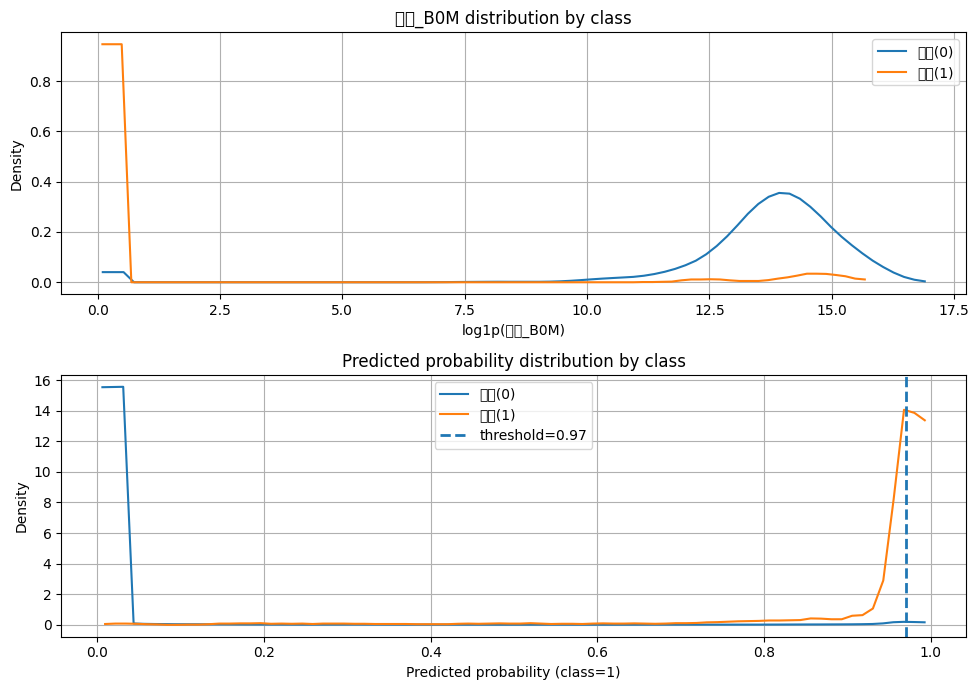

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 설정: 보고 싶은 변수 + 임계값
# ---------------------------
feature = "잔액_B0M"     # 원하는 변수명으로 바꿔
threshold = 0.97        # 원하는 임계값 (예: 0.8, 0.97 등)

# 로그 변환 옵션 (잔액/금액처럼 꼬리 긴 변수면 True 추천)
use_log_feature = True

# ---------------------------
# 데이터 준비 (테스트셋 기준)
# ---------------------------
# 1) 모델 예측확률
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# 2) plot용 DF
plot_df = pd.DataFrame({
    "y": y_test.values,
    "proba": y_proba,
    "feature": X_test[feature].values
})

# 3) 로그 변환 (선택)
if use_log_feature:
    plot_df["feature_plot"] = np.log1p(plot_df["feature"])
    feature_xlabel = f"log1p({feature})"
else:
    plot_df["feature_plot"] = plot_df["feature"]
    feature_xlabel = feature

# ---------------------------
# 간단 KDE 함수(히스토그램 기반 부드럽게)
# (seaborn 없이 density 느낌 내기)
# ---------------------------
def smooth_density(x, bins=80):
    x = x[np.isfinite(x)]
    hist, edges = np.histogram(x, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2
    # 아주 간단한 smoothing (이동평균)
    kernel = np.ones(5) / 5
    hist_s = np.convolve(hist, kernel, mode="same")
    return centers, hist_s

# ---------------------------
# 그림 그리기 (2행 1열)
# ---------------------------
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

# (위) 변수 분포
x0 = plot_df.loc[plot_df["y"] == 0, "feature_plot"].values
x1 = plot_df.loc[plot_df["y"] == 1, "feature_plot"].values

c0, d0 = smooth_density(x0)
c1, d1 = smooth_density(x1)

axes[0].plot(c0, d0, label="잔류(0)")
axes[0].plot(c1, d1, label="이탈(1)")
axes[0].set_title(f"{feature} distribution by class")
axes[0].set_xlabel(feature_xlabel)
axes[0].set_ylabel("Density")
axes[0].legend()
axes[0].grid(True)

# (아래) 예측확률 분포 + 임계선
p0 = plot_df.loc[plot_df["y"] == 0, "proba"].values
p1 = plot_df.loc[plot_df["y"] == 1, "proba"].values

cp0, dp0 = smooth_density(p0, bins=80)
cp1, dp1 = smooth_density(p1, bins=80)

axes[1].plot(cp0, dp0, label="잔류(0)")
axes[1].plot(cp1, dp1, label="이탈(1)")
axes[1].axvline(threshold, linestyle="--", linewidth=2, label=f"threshold={threshold}")
axes[1].set_title("Predicted probability distribution by class")
axes[1].set_xlabel("Predicted probability (class=1)")
axes[1].set_ylabel("Density")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()